# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**Data Dictionary**

- **PatientId:** Identification of a patient
- **AppointmentID:** Identification of each appointment
- **Gender:** Male or Female
- **ScheduledDay:** the day when the patient called or registered the appointment
- **AppointmentDay:** the day of the actual appointment, when they have to visit the doctor
- **Age:** How old is the patient
- **Neighbourhood:** Where the appointment takes place
- **Scholarship:** True of False 
- **Hipertension:** True or False
- **Diabetes:** True or False
- **Alcoholism:** True or False
- **Diabetes:** True or False
- **SMS_received:** True or False
- **No-show:** True or False

### Question(s) for Analysis
* Q1: does age affect attendance rate?
* Q2: what factors affect patients' attendance the most?
* Q3: which age category is affected the most by chronic diseases?
* Q4: does age and chronic diseases affect attendance rate?
* Q5: does age and gender affect attendance rate?
* Q6: does neighbourhood affect attendance rate?
* Q7: does neighbourhood & sms_received affect attendance?
* Q8: does neighbourhood & age affect attendance?

In [110]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we'll load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

In [111]:
# loading data 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# check
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [112]:
# dataset dimensions
df.shape

(110527, 14)

this dataset has dimensions of 110527 rows and 14 columns

In [113]:
# check for more detailed info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


we have "ScheduledDay" and "AppointmentDay" columns in string format which should be in datetime format but we'll be dropping these two in the cleaning section as we'll not be using for analysis

In [114]:
# check for missing values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

there's no missing values in our dataset

In [115]:
# check for duplicated values
df.duplicated().sum()

0

In [116]:
# check for duplicated patient ids
df['PatientId'].duplicated().sum()

48228

In [117]:
# check if the patient ids have the same status of no-show
df[['PatientId', 'No-show']].duplicated().sum()

38710

we have duplicated values of patient ids with the same no-show status which will be dropped in the cleaning section

In [118]:
# check for some statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


here we noticed 2 things which will be dropped in the cleaning section;
* min value of "Age" column is (-1) which is obviously wrong value
* max value of "Handcap" column is (4) which is inconsistent with the data documentation



### Data Cleaning

We'll be making some changes in this section for more readable and insightful data;
* converting all columns names to lowercase letters
* removing duplicated values of patient ids having the same no-show status
* removing the wrong value of age which is (-1)
* removing inconsistent entries of handcap column
* correcting some columns names and replacing hyphen with underscore symbol
* converting showed column to integer to make it easy to read
* dropping unnecessary columns

In [119]:
# convert columns names to lowercase
df.columns = [x.lower() for x in df.columns]

# check
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [120]:
# drop unnecessary duplicated values
df.drop_duplicates(['patientid', 'no-show'], inplace = True)

# check
df.shape

(71817, 14)

In [121]:
# search for rows where age < 0
df.loc[df['age'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [122]:
# drop wrong age data
df.drop(index = 99832, inplace = True)

# check
df.shape

(71816, 14)

In [123]:
# drop inconsistent handcap entries
ind = df.query('handcap in [2, 3, 4]').index
df.drop(index = ind, inplace = True)

# check
df.shape

(71689, 14)

In [124]:
# prettifying columns names and fixing some typos
df.rename(columns = {'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension',
                'handcap':'handicap', 'no-show':'showed'}, inplace = True)

# check
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [125]:
# converting showed column to int to make it easy to read
df['showed'] = df['showed'].apply(lambda x: x.replace('No','1'))
df['showed'] = df['showed'].apply(lambda x: x.replace('Yes','0'))
df['showed'] = df['showed'].astype(int)

# check
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [126]:
# drop unnecessary columns
df.drop(['patient_id', 'appointment_id', 'scheduled_day', 'appointment_day'], axis = 1, inplace = True)

# check
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1



### Data Wrangling Summary
Let's go through our steps after loading the dataset;
* checked dataset dimensions (110527 rows, 14 columns)
* checked detailed info of the dataset including columns formats
* checked if there're any missing values (luckily, we didn't have any)
* checked if there're any unnecessary duplicated values (we had some)
* checked some quick analysis of numeric columns (min, mean, max, etc..)
* finally, did some cleaning for more readable, insightful data

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 


### Let's plot a histogram of the entire dataframe

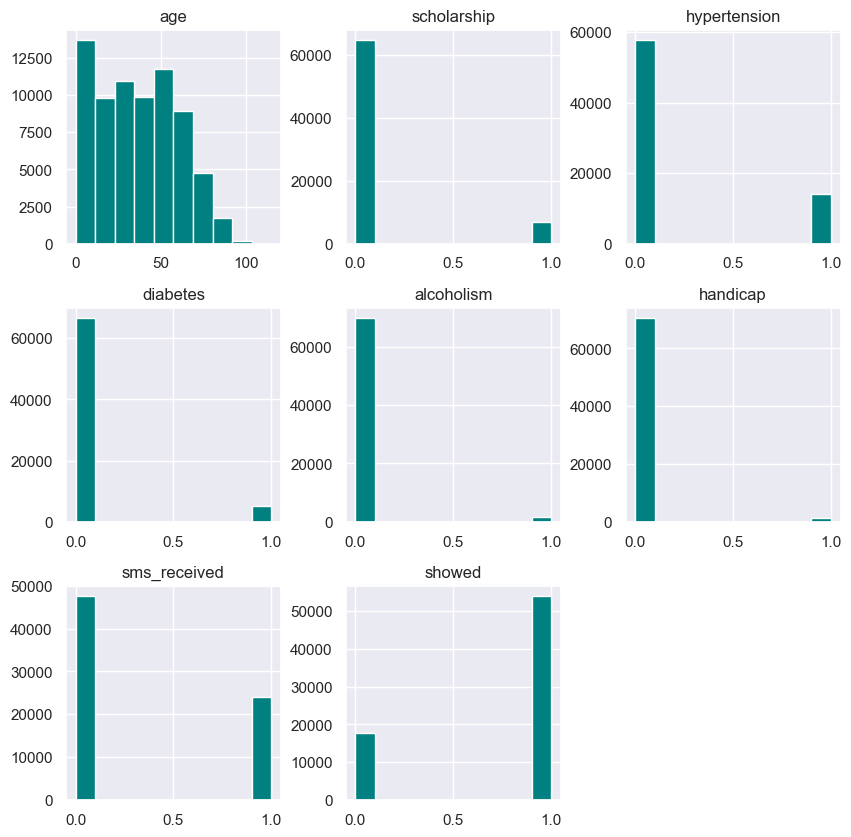

In [127]:
# histogram overview
sns.set_style('darkgrid')
custom_palette = ['teal', 'hotpink']
sns.set_palette(custom_palette)
df.hist(figsize = (10, 10));

### Overall showed vs not_showed patients

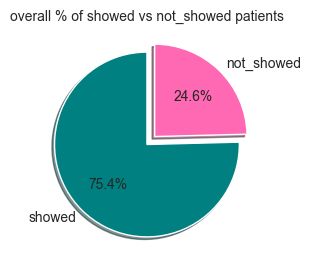

In [128]:
# showed vs notshowed overview
df.showed.value_counts().plot(kind = 'pie', colors = custom_palette, label = '', labels = ('showed', 'not_showed'), explode = [0, 0.12], shadow = True, startangle = 90, figsize = (3, 3), fontsize = 10, autopct='%1.1f%%');
plt.title('overall % of showed vs not_showed patients', fontsize = 10);

the percentage of not_showed patients is nearly 25%, this may cause burden to the health care system, analyzing the given data to find potential causes of no-shows, may help the health authorities in Brazil to predict those who will not show up for their appointment so they can either schedule more appointments to help more patients or reduce the medical staff manpower to trim unneeded cost.

### Q1: does age affect attendance rate?

max age = 115


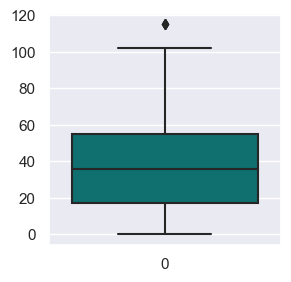

In [129]:
# overview of age in our dataset
fig, ax = plt.subplots(figsize = (3, 3))
sns.boxplot(df['age'], color = 'teal')

print('max age =', df['age'].max());

* the average age of the patients is approximately 37 years.
* the highest age recorded is 115 years.

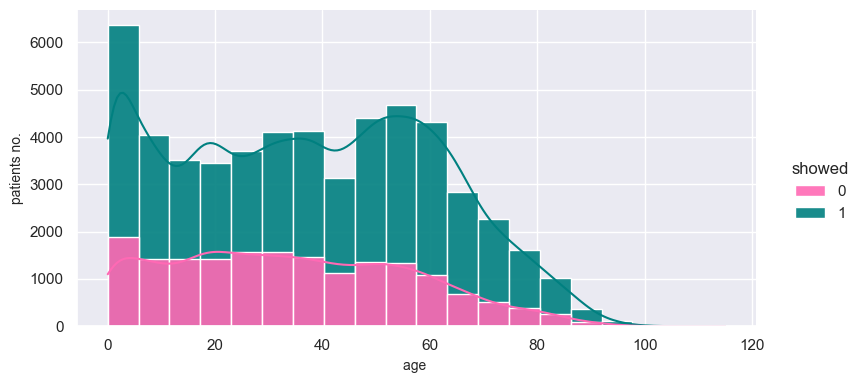

In [130]:
# check if age affect showed column
# first we'll divide showed column to showed, notshowed
showed = df.showed == 1
not_showed = df.showed == 0

custom_palette = ['hotpink', 'teal']
sns.set_palette(custom_palette)
ax = sns.displot(x = df['age'] , hue = df['showed'], palette = custom_palette, kind = 'hist', alpha = 0.9, bins = 20, kde = True, height = 4, aspect = 2, row_order = df['age'].value_counts().index)
plt.xlabel('age ', fontsize = 10)
plt.ylabel('patients no.', fontsize = 10);
plt.show()

* it becomes clear to us some data shows that the older the age, the lower the attendance rate
* age does clearly affect attendance (most showed patients are between 0 ~ 10 years old)
* age is an important factor in predicting whether a patient will show up for their appointment

   showed       cat   size
0       0    adults   8893
1       0  children   3378
2       0   seniors   2875
3       0    youths   2486
4       1    adults  27297
5       1  children  10157
6       1   seniors  10576
7       1    youths   6027
adults      0.504967
seniors     0.195645
children    0.187894
youths      0.111493
Name: cat, dtype: float64


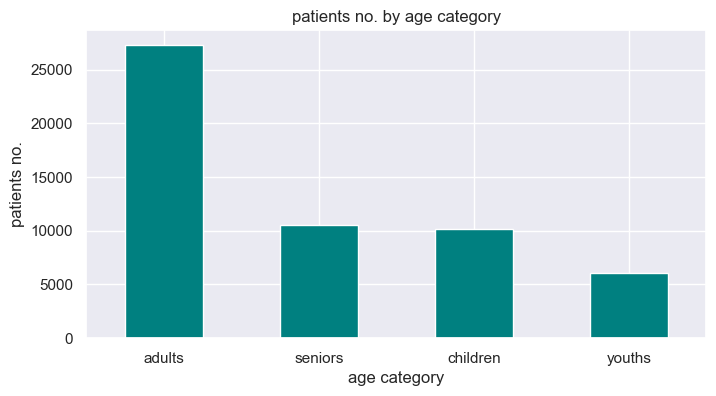

In [132]:
# categorizing the age column for better understanding of the distribution
def cat(x):
    if (x > 0) and (x <= 14):
        x = 'children'
    elif (x > 15) and (x <= 24):
        x = 'youths'
    elif (x > 25) and (x <= 64):
        x = 'adults'
    else:
        x = 'seniors'
    return x
df['cat'] = df['age'].apply(cat)

# plotting age categories vs attendance
ax = plt.subplots(figsize = (8, 4))
ax = df['cat'][showed].value_counts().plot(kind = 'bar', title = 'patients no. by age category', rot = 0, color = 'teal')
ax.set_xlabel('age category')
ax.set_ylabel('patients no.');

print(df.groupby(['showed', 'cat'], as_index=False).size())
print(df['cat'][showed].value_counts(normalize = True))

* this shows that approximately 50% of patients who attended are adults, 19.5% are seniors, 18.7% are children and 11.14% are youth

### Q2:  what factors affect patients' attendance the most?

F    0.647282
M    0.352718
Name: gender, dtype: float64
0    0.904476
1    0.095524
Name: scholarship, dtype: float64
0    0.805242
1    0.194758
Name: hypertension, dtype: float64
0    0.929194
1    0.070806
Name: diabetes, dtype: float64
0    0.974975
1    0.025025
Name: alcoholism, dtype: float64
0    0.983568
1    0.016432
Name: handicap, dtype: float64
0    0.664328
1    0.335672
Name: sms_received, dtype: float64


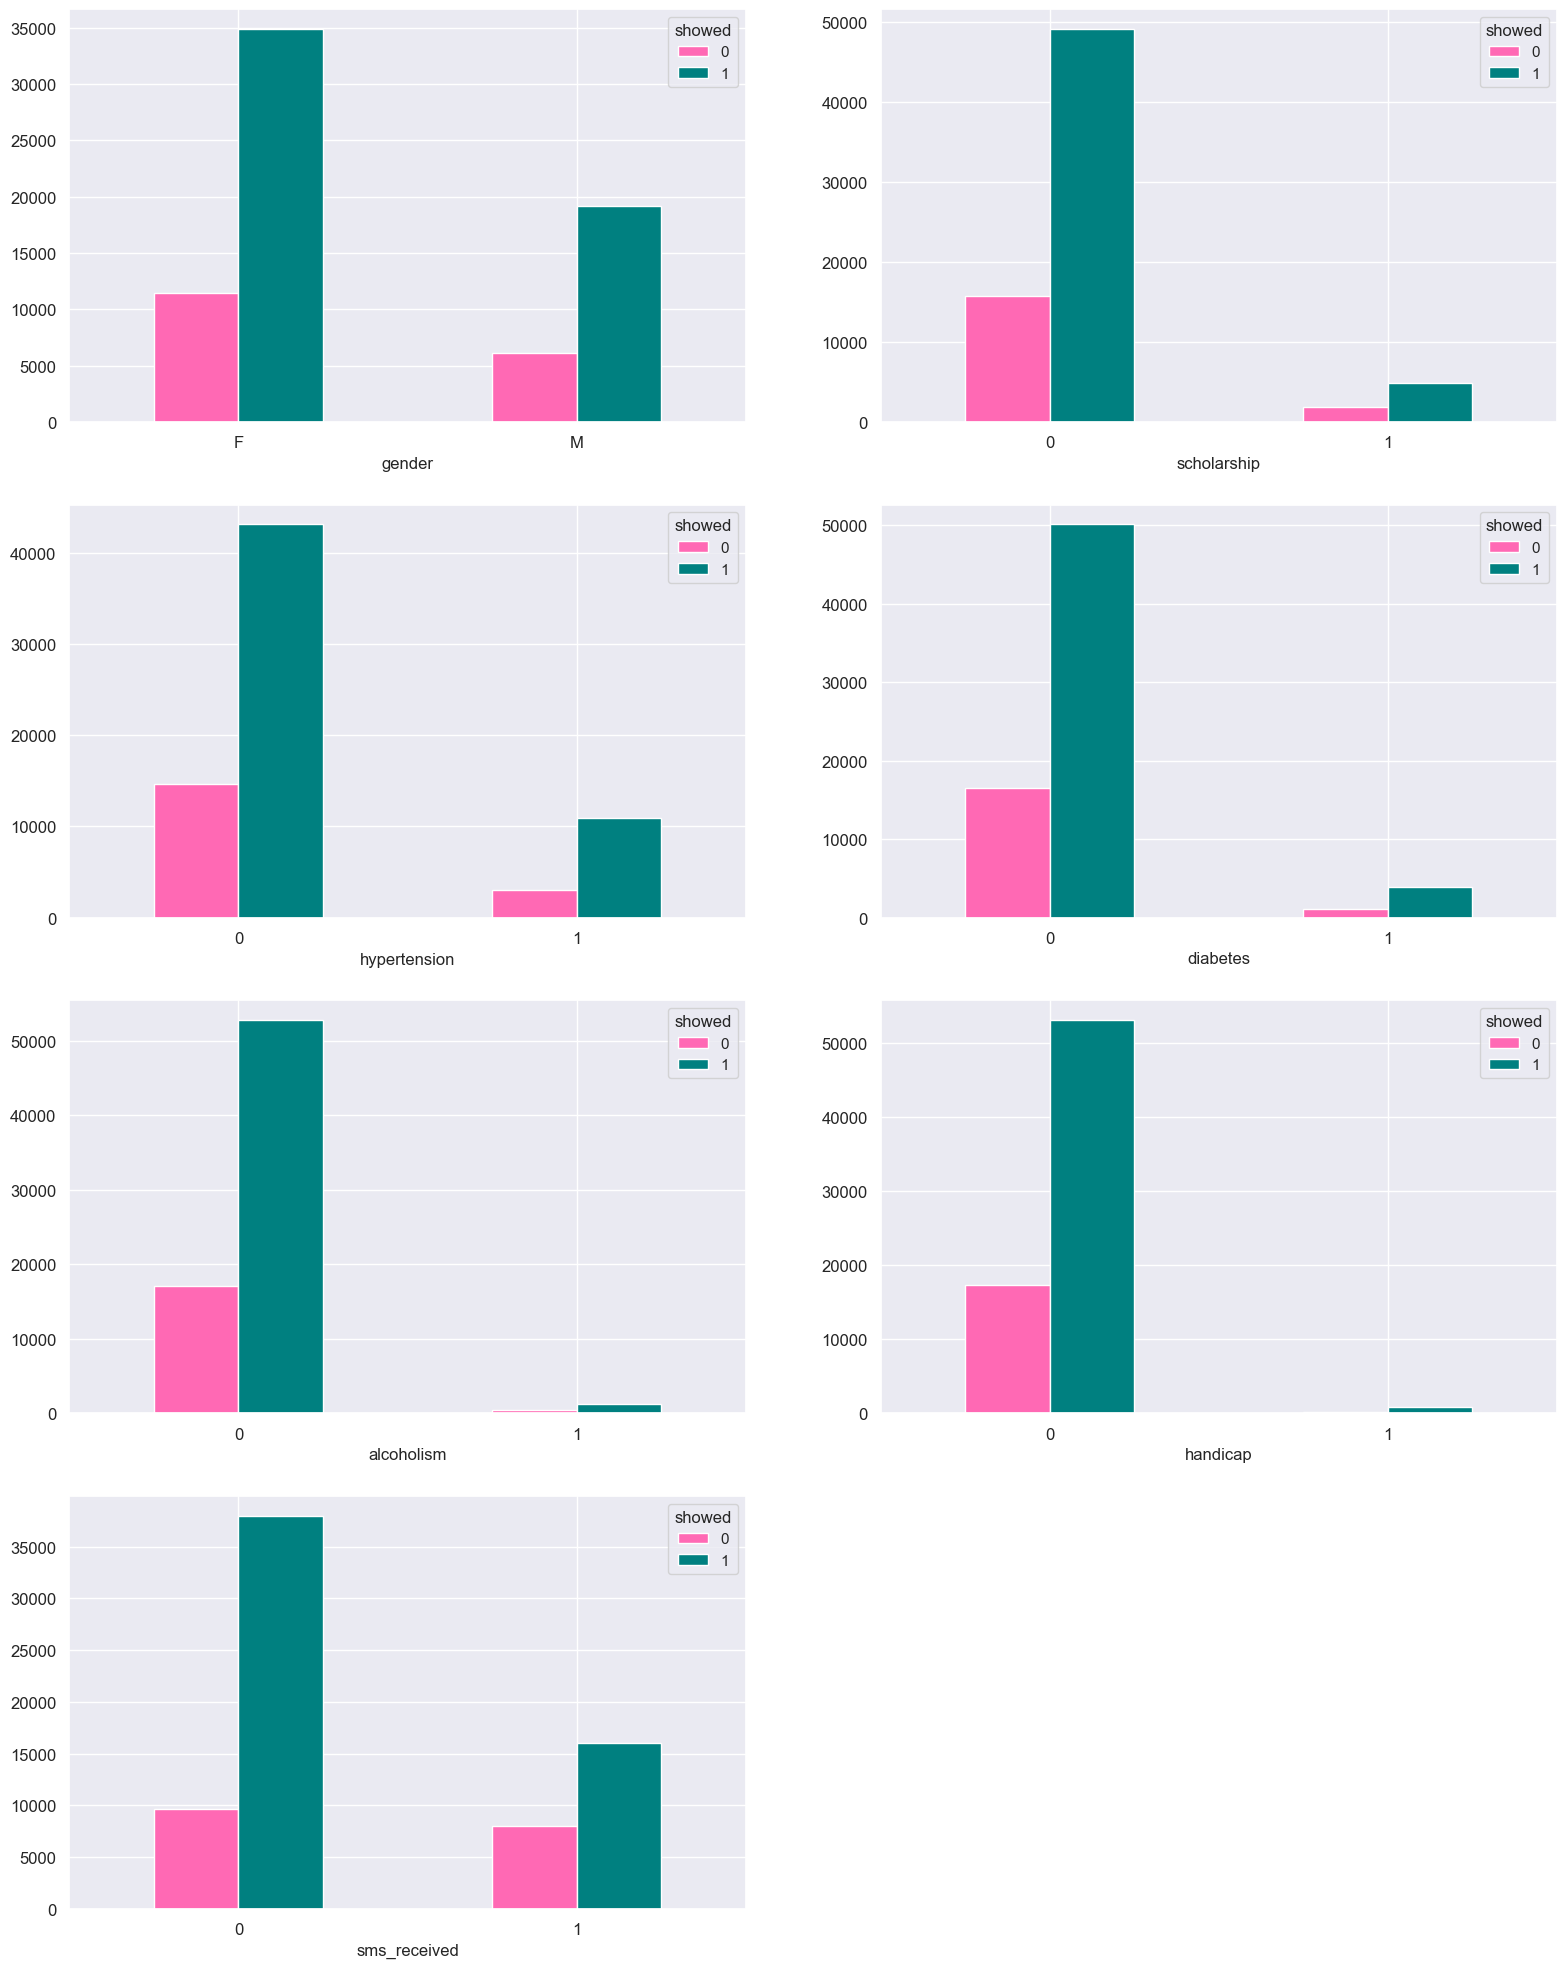

In [133]:
# plotting different data features vs attendance
variables = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']

fig = plt.figure(figsize = (17, 10))
for i, variable in enumerate(variables):
    ax = plt.subplot(4, 2, i+1)
    plt.subplots_adjust(bottom = 0.1, right = 1, top = 2)  
    df.groupby([variable, 'showed'])[variable].count().unstack(level = 1).plot(ax = ax, kind = 'bar', fontsize = 12, color = custom_palette, rot = 0)
    
print(df['gender'].value_counts(normalize = True)),
print(df['scholarship'].value_counts(normalize = True)),
print(df['hypertension'].value_counts(normalize = True)),
print(df['diabetes'].value_counts(normalize = True)),
print(df['alcoholism'].value_counts(normalize = True)),
print(df['handicap'].value_counts(normalize = True)),
print(df['sms_received'].value_counts(normalize = True));

this shows that;
* 64% of patients who attended are females
* 90% of patients who attended has no scholarship
* 19% of patients who attended are suffering from hypertension, 7% from diabetes, ~ 3% from alcoholism and around 2% are handicapped
* 66% of patients who did not receive sms has attended

from our analysis, there was no distinct feature that was noticed to have had an effect on patients showing up for their appointments. more analysis would be needed to be carried out on each of the features to get more insights.

### Q3: which age category is affected the most by chronic diseases?

        cat  hypertension   size
0    adults             0  27865
1    adults             1   8325
2  children             0  13521
3  children             1     14
4   seniors             0   7880
5   seniors             1   5571
6    youths             0   8461
7    youths             1     52
        cat  diabetes   size
0    adults         0  33336
1    adults         1   2854
2  children         0  13522
3  children         1     13
4   seniors         0  11285
5   seniors         1   2166
6    youths         0   8470
7    youths         1     43


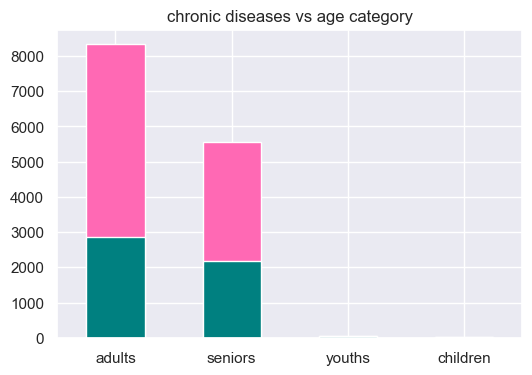

In [139]:
# plotting age categories vs attendance
plt.figure(figsize = (6, 4))
hypertension = df[df['hypertension'] == 1]
ax = hypertension['cat'].value_counts().plot(kind = 'bar', alpha = 1, color = 'hotpink', rot = 0)
diabetes = df[df['diabetes'] == 1]
ax = diabetes['cat'].value_counts().plot(kind = 'bar', alpha = 1, color = 'teal', rot = 0)
plt.title('chronic diseases vs age category')

print(df.groupby(['cat', 'hypertension'], as_index = False).size());
print(df.groupby(['cat', 'diabetes'], as_index = False).size());

this shows that;
* 8325 of adults and 5571 of seniors have hypertension
* 2854 of adults and 2166 of seniors have diabetes

### Q4: does age and chronic diseases affect attendance rate?

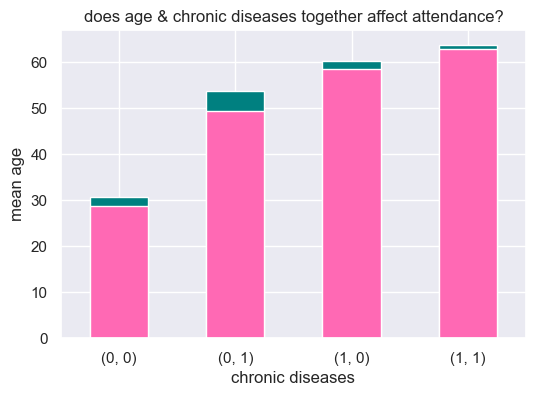

In [138]:
# check if age & chronic diseases affect showed column
plt.figure(figsize = (6,4))
ax = df[showed].groupby(['hypertension', 'diabetes']).age.mean().plot(kind = 'bar', label = 'showed', color = 'teal', rot = 0)
ax = df[not_showed].groupby(['hypertension', 'diabetes']).age.mean().plot(kind = 'bar', label = 'not_showed', color = 'hotpink', rot = 0)
plt.title('does age & chronic diseases together affect attendance?')
plt.xlabel('chronic diseases')
plt.ylabel('mean age');

mean age of non-chronic diseases patients who showed is around 31 while not_showed patients around 28, mean age of chronic diseases patients who showed is around 64 while not_showed patients around 63, which means that there's correlation between age and chronic diseases while there's no correlation between chronic diseases and patients' attendance

### Q5: does age and gender affect attendance rate?

gender
F    39.125337
M    33.743353
Name: age, dtype: float64
gender
F    36.04500
M    31.18167
Name: age, dtype: float64


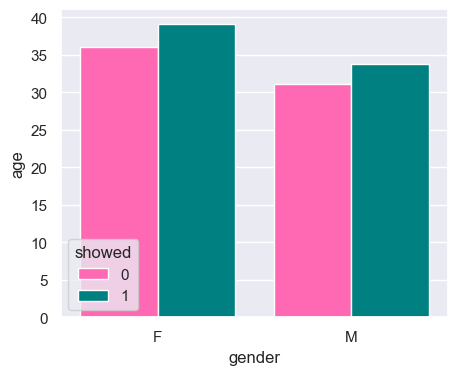

In [153]:
# check if age & gender affect showed column
sns.set(rc={'figure.figsize':(5,4)})
sns.barplot(x = 'gender', y = 'age', estimator='mean', data = df, hue= 'showed', palette = custom_palette, saturation = 1, errorbar = ('ci', 0));

print(df[showed].groupby('gender').age.mean());
print(df[not_showed].groupby('gender').age.mean());

Clearly, age and gender has no effect on attendance

### Q6: does neighbourhood affect attendance rate?

JARDIM CAMBURI       0.067817
MARIA ORTIZ          0.052630
JARDIM DA PENHA      0.039865
RESISTÊNCIA          0.038737
ITARARÉ              0.032225
                       ...   
PONTAL DE CAMBURI    0.000703
ILHA DO BOI          0.000388
AEROPORTO            0.000111
ILHA DO FRADE        0.000074
PARQUE INDUSTRIAL    0.000018
Name: neighbourhood, Length: 80, dtype: float64
JARDIM CAMBURI     3666
MARIA ORTIZ        2845
JARDIM DA PENHA    2155
RESISTÊNCIA        2094
ITARARÉ            1742
TABUAZEIRO         1653
CENTRO             1608
SANTA MARTHA       1571
SANTO ANTÔNIO      1487
BONFIM             1381
Name: neighbourhood, dtype: int64


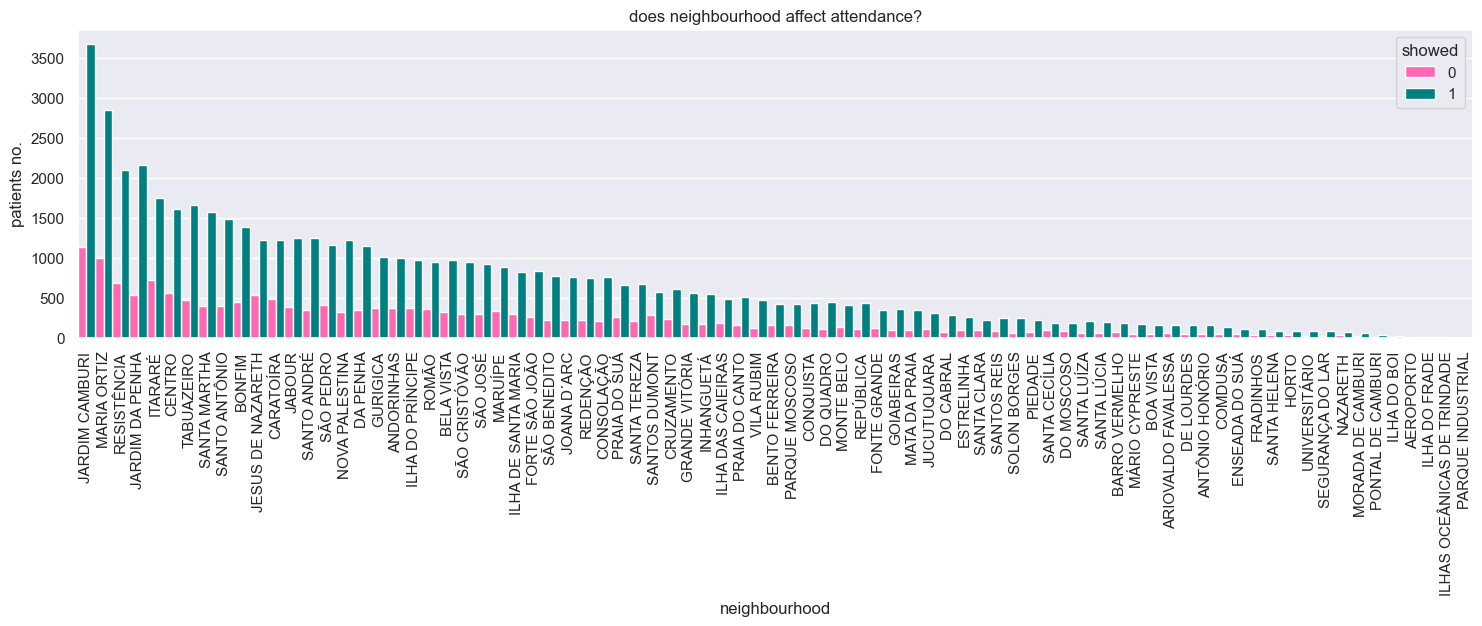

In [148]:
# check if neighbourhood column affect showed column 
# **we used value_counts() as neighbourhood column is not numeric**
custom_palette = ['hotpink', 'teal']
sns.set_palette(custom_palette)
plt.figure(figsize = (18, 4))
plt.xticks(rotation = 90)
ax = sns.countplot(x = df['neighbourhood'] , hue = df['showed'], palette = custom_palette, width = 1, saturation = 1.5, order = df['neighbourhood'].value_counts().index)
ax.set_title('does neighbourhood affect attendance?')
plt.ylabel('patients no.')
print(df['neighbourhood'][showed].value_counts(normalize = True))
print(df['neighbourhood'][showed].value_counts().head(10))

* in the previous figure, we find that the percentage of attendance varies from one place to another
* neighbourhood has a great effect on attendance (JARDIM CAMBURI has most patients no. and showing rate as well)


### Q7: does neighbourhood & sms_received affect attendance?

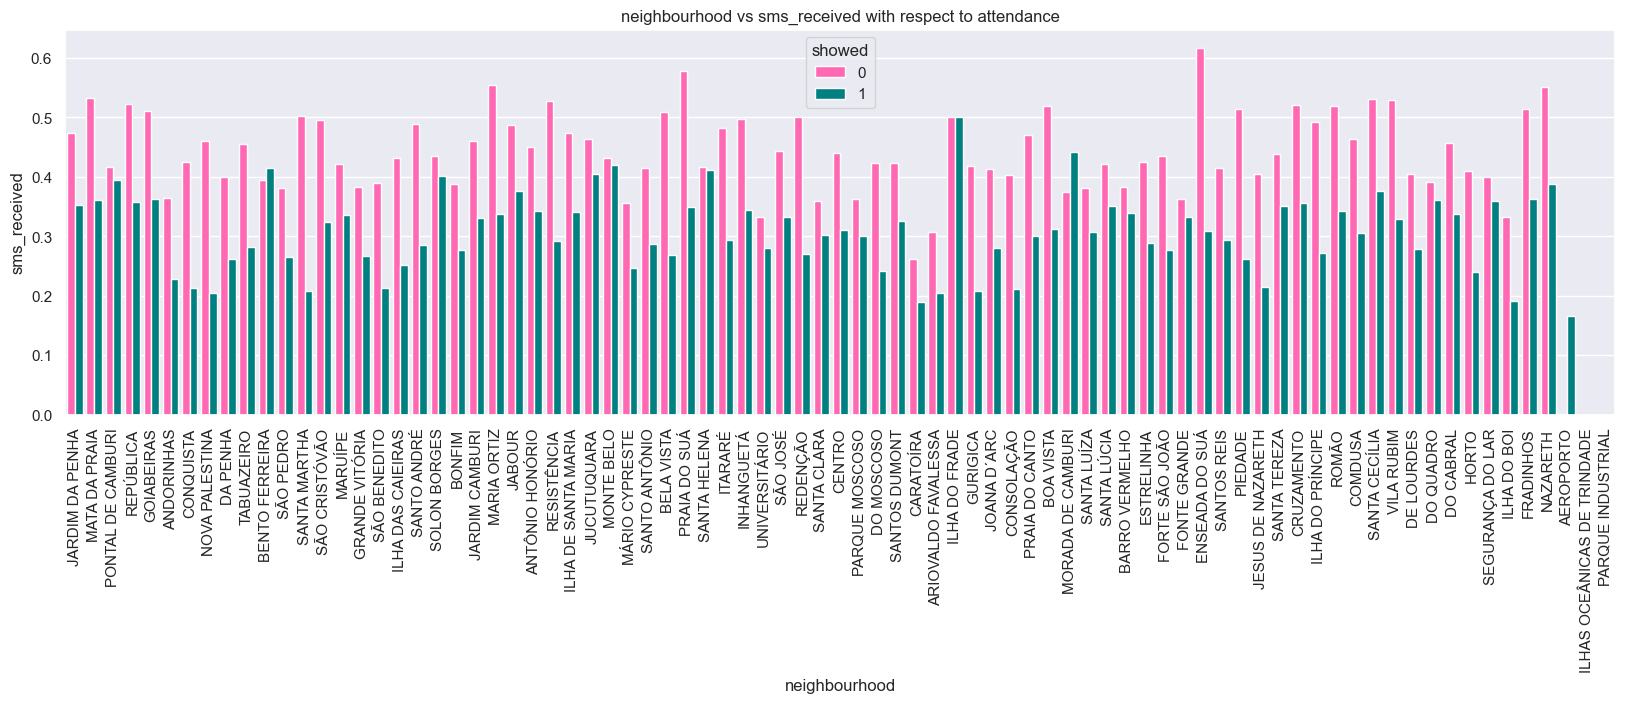

In [149]:
# check if neighbourhood & sms_received affect showed column
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_style("darkgrid")
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'neighbourhood', y = 'sms_received', hue = 'showed', palette = custom_palette, saturation = 1, errorbar=('ci', 0))
plt.title('neighbourhood vs sms_received with respect to attendance');

In [155]:
df[showed].groupby('neighbourhood').sms_received.mean()

neighbourhood
AEROPORTO              0.166667
ANDORINHAS             0.228370
ANTÔNIO HONÓRIO        0.341935
ARIOVALDO FAVALESSA    0.203947
BARRO VERMELHO         0.338624
                         ...   
SÃO JOSÉ               0.333333
SÃO PEDRO              0.265165
TABUAZEIRO             0.282517
UNIVERSITÁRIO          0.280488
VILA RUBIM             0.329810
Name: sms_received, Length: 80, dtype: float64

### Q8: does neighbourhood & age affect attendance?

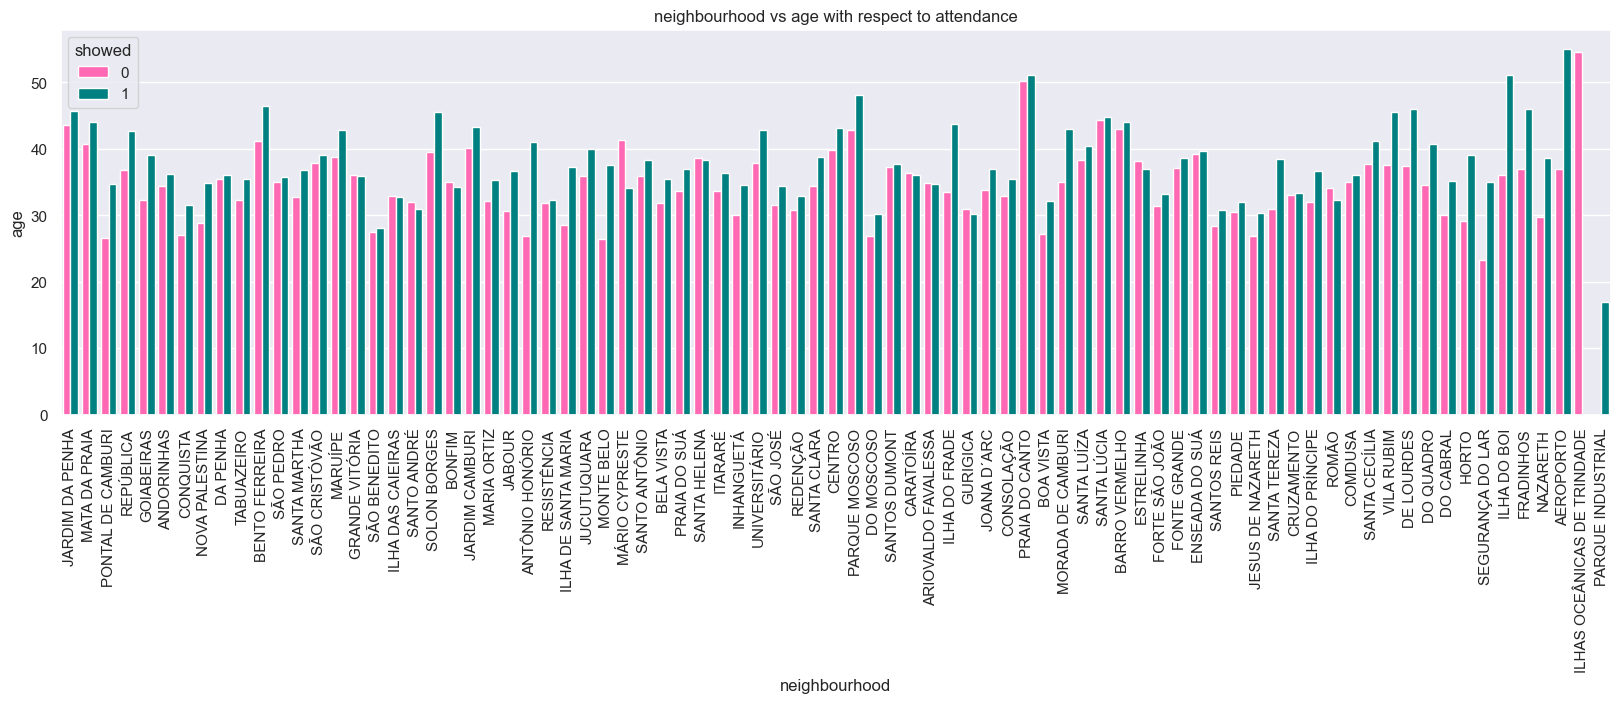

In [154]:
# check if neighbourhood & age affect showed column
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style('darkgrid')
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'neighbourhood', y = 'age', hue = 'showed', palette = custom_palette, saturation = 1, errorbar = ('ci', 0))
plt.title('neighbourhood vs age with respect to attendance');

In [156]:
df[showed].groupby('neighbourhood').age.mean()

neighbourhood
AEROPORTO              55.000000
ANDORINHAS             36.156942
ANTÔNIO HONÓRIO        40.967742
ARIOVALDO FAVALESSA    34.684211
BARRO VERMELHO         44.026455
                         ...    
SÃO JOSÉ               34.441176
SÃO PEDRO              35.746101
TABUAZEIRO             35.488808
UNIVERSITÁRIO          42.817073
VILA RUBIM             45.543340
Name: age, Length: 80, dtype: float64

<a id='conclusions'></a>
## Conclusions

* nearly 25% of patients miss their appointment
* age has a clear influence on attendance rate (most showed patients are between 0 ~ 10 years old)
* more females booked for appointment compared to their male counterparts (64% of females showed up for their appointment)
* 90% of patients who attended has no scholarship which clearly shows that scholarship has no effect on attendance rate
* 66% of patients who did not receive sms has attended (that may indicate that we need to work more on sms campaign)
* adults and seniors are more affected by chronic diseases (hypertension and diabetes)
* there's no correlation between chronic diseases and patients' attendance
* neighbourhood has a great effect on attendance (JARDIM CAMBURI has most patients no. and showing rate as well)
* no. of showing patients from specific neighbourhood is affected by receiving sms and age


## Limitations

* The female gender might be oversampled in this dataset.
* no_show column may cause confusion because the values inside it are reversed with the negation in the column name.
* most columns take only two values 0 or 1 which made the deep investigation and the discovering the correlation is difficult.
* we don't have enough details for certain factors to draw conclusions like sms_ received example; the data shows that patients who did not show up are more likely to receive an sms.This may seem counter intuitive, but we do not have information on the conditions of when the sms was sent.
* some of the independent variables like gender can not be used singularly to predict whether a patient will show up, combining them with other independent variables may give them some predictive power or effect on the dependent variable.
* having additional data of population of each neighborhood can help in making better assumptions of the neighborhoods and appointments